## Basic GYM rewview on Cartpole problem

We use sample from uniform random actions

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def get_action(s, w):
    return 1 if s.dot(w) > 0 else 0

def play_one_episode(env, params):
    observation = env.reset()
    done = False
    t = 0 # initial number of step
    r = 0 # total reward
    
    while not done and t < 10000: # number of games/iterations
        t += 1
        action = get_action(observation, params)
        observation, reward, done, info = env.step(action)
        
        r += reward

    return r

# we play multiple games as the environment are stochastic
def play_multiple_episodes(env, T, params): # T number of episodes
    episode_rewards = np.empty(T)

    for i in range(T):
        episode_rewards[i] = play_one_episode(env, params)

    avg_reward = episode_rewards.mean()
    print("avg reward:", avg_reward)
    
    return avg_reward

def random_search(env):
    """
    Takes in an environment object and performs 
    a random search algorithm to find the best parameters
    """
    episode_rewards = [] # store rewards
    best = 0 # best rewards
    params = None # set of parameters
    
    for t in range(100): # number of games
        # state space of cartpole is of size 4 and policy is just a dot producdt
        new_params = np.random.random(4)*2 - 1 # vector of size 4 uniform distributed [-1, +1]
        avg_reward = play_multiple_episodes(env, 100, new_params) # 200 episodes
        episode_rewards.append(avg_reward) # save rewards
        
        if avg_reward > best: # check if new average reward is better than current best reward
            params = new_params
            best = avg_reward
            
    return episode_rewards, params

In [71]:
env = gym.make('CartPole-v0')

In [72]:
episode_rewards, params = random_search(env)

avg reward: 40.52
avg reward: 9.65
avg reward: 93.96
avg reward: 11.58
avg reward: 54.27
avg reward: 9.88
avg reward: 9.43
avg reward: 157.05
avg reward: 9.48
avg reward: 9.61
avg reward: 9.27
avg reward: 9.69
avg reward: 9.18
avg reward: 8.98
avg reward: 9.22
avg reward: 9.37
avg reward: 9.0
avg reward: 9.07
avg reward: 9.16
avg reward: 80.03
avg reward: 8.83
avg reward: 35.86
avg reward: 194.86
avg reward: 9.84
avg reward: 39.87
avg reward: 9.9
avg reward: 9.34
avg reward: 9.6
avg reward: 8.88
avg reward: 9.76
avg reward: 74.41
avg reward: 56.61
avg reward: 37.89
avg reward: 9.3
avg reward: 121.52
avg reward: 9.71
avg reward: 8.84
avg reward: 9.2
avg reward: 58.67
avg reward: 9.16
avg reward: 48.94
avg reward: 9.49
avg reward: 8.97
avg reward: 88.09
avg reward: 45.54
avg reward: 9.21
avg reward: 126.84
avg reward: 200.0
avg reward: 9.64
avg reward: 200.0
avg reward: 32.78
avg reward: 16.13
avg reward: 9.71
avg reward: 33.85
avg reward: 9.3
avg reward: 58.58
avg reward: 9.02
avg rewar

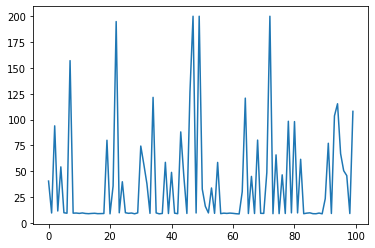

In [73]:
# plot reward
plt.plot(episode_rewards)
plt.show()

In [74]:
# play a final set of episodes
print("***Final run with final weights**")
play_multiple_episodes(env, 100, params)

***Final run with final weights**
avg reward: 200.0


200.0